In [1]:
def label(string: str):
    parts = string.split("_")
    code_dim = int(parts[1])
    learning_rate = float(parts[2])
    batch_size = int(parts[3])
    return f"Code Dimension: {code_dim}, Learning Rate: {learning_rate}, Batch Size: {batch_size}"

optimizer_36_0.9_128
optimizer_36_1_128
noise
optimizer_12_0.9_128
optimizer_36_0.9_16
optimizer_36_0.09_128
optimizer_best
optimizer_36_0.9_512
optimizer_108_0.9_128


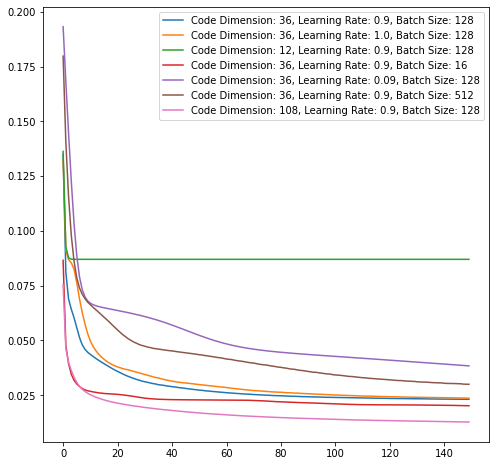

In [2]:
import pickle
import os
import matplotlib.pyplot as plt

from models.neural_network import CustomizedNeuralNetwork
from models.optimizer import Optimizer

plt.figure(figsize=(8, 8))  


path = "saved_models/optimizers/"

code_dims = [12, 36, 108]
learning_rates = [1, 0.9, 0.09]
batch_sizes = [16, 128, 512]

basic_metrics = [code_dims[1], learning_rates[1], batch_sizes[1]]

for file in os.listdir(path):
    print(file)
    if "best" in file:
        continue
    try:
        with open(path + file, "rb") as pickle_file:
            optimizer: Optimizer = pickle.load(pickle_file)
            plt.plot(optimizer.loss, label=label(file))
    except IsADirectoryError:
        pass

   
   
plt.legend()
plt.show()
        

In [3]:
from dataset.dataset import load_fashion_mnist_dataset
import numpy as np

_, X_test = load_fashion_mnist_dataset()
X_test.shape

2023-11-12 17:36:00.173257: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-12 17:36:00.267235: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-12 17:36:00.268461: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-12 17:36:02.279199: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


(10000, 784)

In [4]:

def get_random_test():
    random_index = np.random.randint(0, 1000)
    return X_test[random_index]

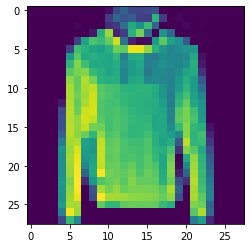

In [5]:
from matplotlib import pyplot as plt

random_test = get_random_test()

plt.imshow(random_test.reshape(28, 28), interpolation='nearest')
plt.show()

In [6]:

from umap import UMAP

from models.neural_network import Autoencoder

path = "saved_models/networks/"

trained_networks: Autoencoder = []
trained_networks_dict = {}

for file in os.listdir(path):
    try:
        with open(path + file, "rb") as pickle_file:
            network: Autoencoder = pickle.load(pickle_file)
            
        trained_networks.append(network)
        trained_networks_dict[file] = network
    except IsADirectoryError:
        pass


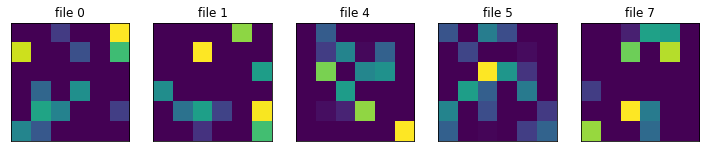

In [7]:
from numpy.typing import NDArray

n = len(trained_networks)
idx = 0

plt.figure(figsize=(20, 4))

compressed_data: list[NDArray] = []

for i, network in enumerate(trained_networks):
    data = network.get_encoded(random_test, 2)
    compressed_data.append(data)

    try:
        data.reshape(6,6)
        ax = plt.subplot(1, n, idx + 1)
        plt.imshow(data.reshape(6, 6), interpolation='nearest')
        plt.title(f"file {i}")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        idx+=1
    except:
        continue

    

plt.show()

In [8]:
import umap
import matplotlib.pyplot as plt
from numpy import ndarray

selected_autoencoders = [file for file in os.listdir(path) if "autoencoder" in file]

_, _, X_test, y_test = load_fashion_mnist_dataset(y=True)

def get_latent_data(network: Autoencoder):
    latent_data = []
    
    for image in X_test:
        data = network.get_encoded(image, len(network.layers) // 2 + 1)
        latent_data.append(data)
    
    return np.array(latent_data).reshape(-1, network.code_dim)

selected_autoencoders


['autoencoder_36_0.9_128',
 'autoencoder_36_0.9_512',
 'autoencoder_108_0.9_128',
 'autoencoder_12_0.9_128',
 'autoencoder_36_1_128',
 'autoencoder_36_0.9_16',
 'autoencoder_best',
 'autoencoder_36_0.09_128']

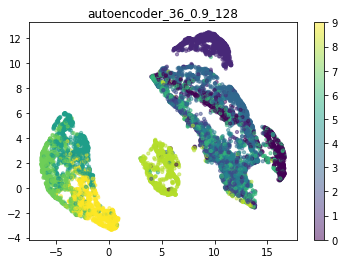

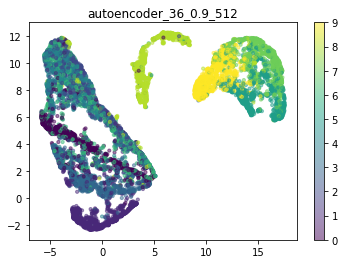

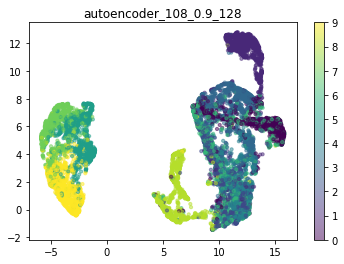

/home/olga/.local/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:545: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


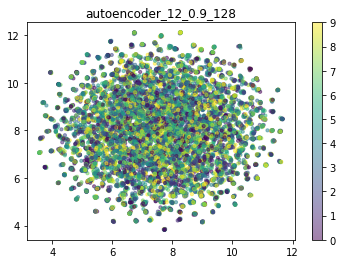

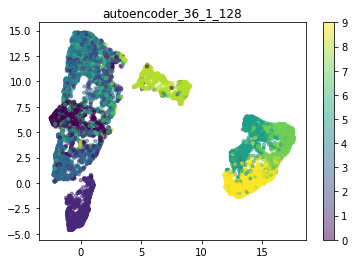

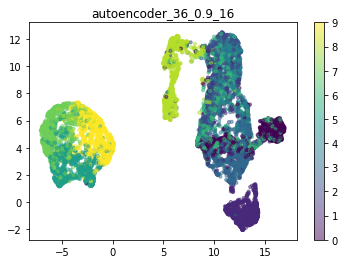

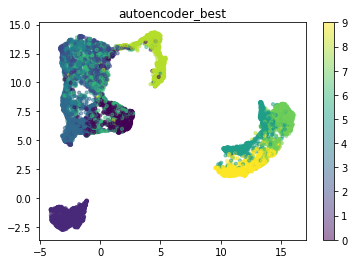

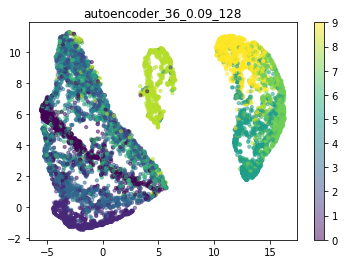

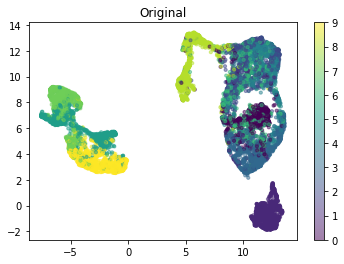

In [9]:
import numpy as np
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt

# Load a dataset as an example

for network_filename in selected_autoencoders:
    network = trained_networks_dict[network_filename]
    X = get_latent_data(network)
    y = y_test

    # Apply PCA for dimensionality reduction (you can replace this with your latent space)
    pca = PCA(n_components=network.code_dim)
    latent_data = pca.fit_transform(X)

    # Reshape the latent_data to 2D array
    latent_data_flat = latent_data.reshape(latent_data.shape[0], -1)

    # Apply UMAP
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(latent_data_flat)

    # Visualize all classes
    plt.scatter(embedding[:, 0], embedding[:, 1], s=10, c=y, cmap='viridis', alpha=0.5)
    plt.title(network_filename)
    plt.colorbar()
    plt.show()
    
    
X = X_test
y = y_test

# Apply PCA for dimensionality reduction (you can replace this with your latent space)
pca = PCA(n_components=network.code_dim)
latent_data = pca.fit_transform(X)

# Reshape the latent_data to 2D array
latent_data_flat = latent_data.reshape(latent_data.shape[0], -1)

# Apply UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(latent_data_flat)

# Visualize all classes
plt.scatter(embedding[:, 0], embedding[:, 1], s=10, c=y, cmap='viridis', alpha=0.5)
plt.title("Original")
plt.colorbar()
plt.show()

## Early stopping results

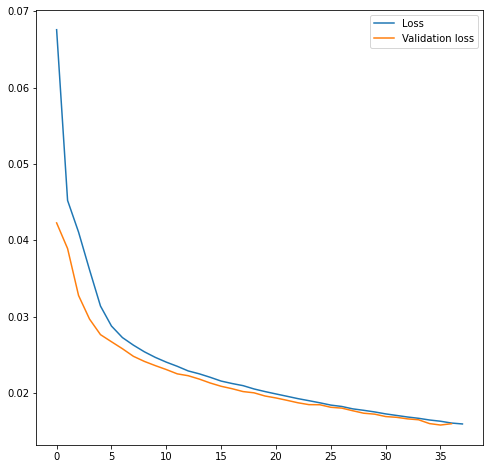

In [9]:
import pickle
import matplotlib.pyplot as plt

from models.optimizer import Optimizer

plt.figure(figsize=(8, 8))

with open("saved_models/optimizers/early_stopping/optimizer", "rb") as pickle_file:
    optimizer: Optimizer = pickle.load(pickle_file)


plt.plot(optimizer.loss, label="Loss")
plt.plot(optimizer.validation_loss, label="Validation loss")

plt.legend()
plt.show()

## Noise results

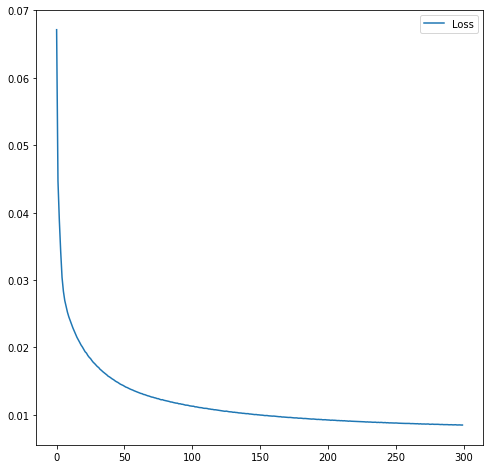

In [24]:
with open("saved_models/optimizers/noise/optimizer", "rb") as pickle_file:
    optimizer: Optimizer = pickle.load(pickle_file)


plt.figure(figsize=(8, 8))
plt.plot(optimizer.loss, label="Loss")
plt.legend()
plt.show()

## Fashion classification

In [9]:
import pickle

from models.optimizer import Optimizer

path = "saved_models/"
classification_path = "fashion_classification/"

with open(f"{path}optimizers/{classification_path}optimizer", 'rb') as pickle_file:
    fashion_optimizer: Optimizer = pickle.load(pickle_file)

with open(f"{path}optimizers/{classification_path}optimizer_on_encoded", 'rb') as pickle_file:
    fashion_optimizer_on_encoded: Optimizer = pickle.load(pickle_file)

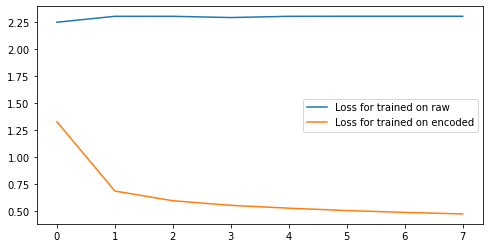

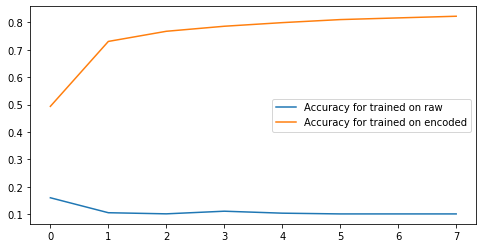

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

plt.plot(fashion_optimizer.loss, label="Loss for trained on raw")
plt.plot(fashion_optimizer_on_encoded.loss, label="Loss for trained on encoded")

plt.legend()
plt.show()

plt.figure(figsize=(8, 4))

plt.plot(fashion_optimizer.accuracy, label="Accuracy for trained on raw")
plt.plot(fashion_optimizer_on_encoded.accuracy, label="Accuracy for trained on encoded")

plt.legend()
plt.show()